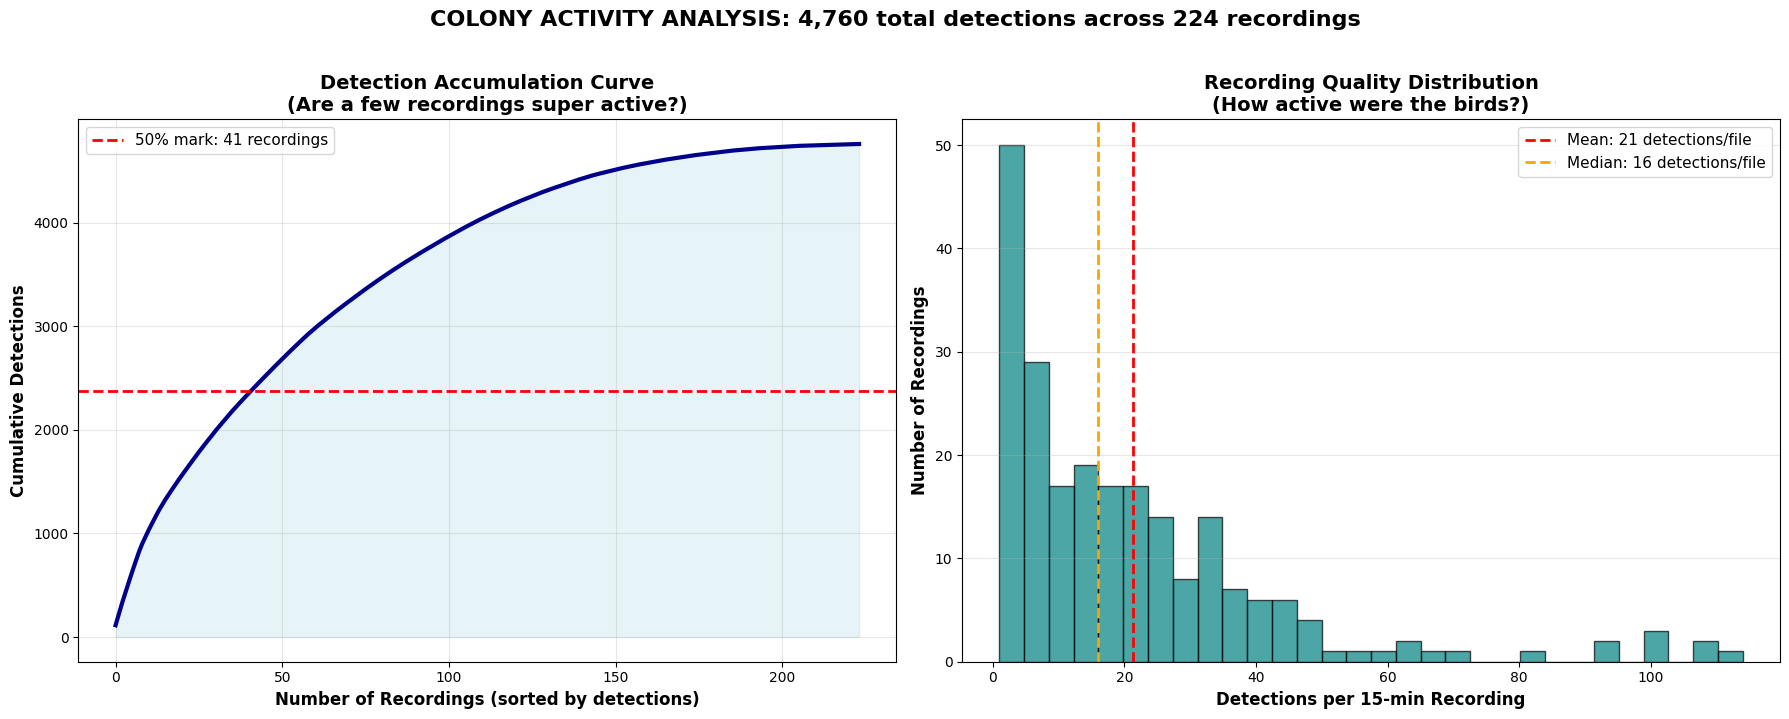


Key Insights:
- Total detections: 4,760
- Unique species: 54
- Most active hour: 18:00 (801 detections)
- Avg detections per recording: 21.2
- Hottest recording: 1_S7899_20250204_184500(UTC+7).wav with 114 detections


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# GRAPH 3: Detection Accumulation Curves - Which recordings are bird hotspots?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Left: Cumulative detections over time (shows recording intensity)
detections_per_file = df.groupby('file_name').size().sort_values(ascending=False)
cumulative = np.cumsum(detections_per_file.values)
x_pos = range(len(cumulative))

ax1.plot(x_pos, cumulative, linewidth=3, color='darkblue')
ax1.fill_between(x_pos, 0, cumulative, alpha=0.3, color='lightblue')
ax1.axhline(cumulative[-1] * 0.5, color='red', linestyle='--', linewidth=2, 
            label=f'50% mark: {np.where(cumulative >= cumulative[-1]*0.5)[0][0]} recordings')
ax1.set_xlabel('Number of Recordings (sorted by detections)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cumulative Detections', fontsize=12, fontweight='bold')
ax1.set_title('Detection Accumulation Curve\n(Are a few recordings super active?)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)


ax2.hist(detections_per_file.values, bins=30, edgecolor='black', color='teal', alpha=0.7)
ax2.axvline(detections_per_file.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {detections_per_file.mean():.0f} detections/file')
ax2.axvline(detections_per_file.median(), color='orange', linestyle='--', linewidth=2,
            label=f'Median: {detections_per_file.median():.0f} detections/file')
ax2.set_xlabel('Detections per 15-min Recording', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Recordings', fontsize=12, fontweight='bold')
ax2.set_title('Recording Quality Distribution\n(How active were the birds?)', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'COLONY ACTIVITY ANALYSIS: {len(df):,} total detections across {df["file_name"].nunique()} recordings',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\nKey Insights:")
print(f"- Total detections: {len(df):,}")
print(f"- Unique species: {df['species_common'].nunique()}")
print(f"- Most active hour: {df.groupby('hour').size().idxmax()}:00 ({df.groupby('hour').size().max()} detections)")
print(f"- Avg detections per recording: {detections_per_file.mean():.1f}")
print(f"- Hottest recording: {detections_per_file.index[0]} with {detections_per_file.values[0]} detections")

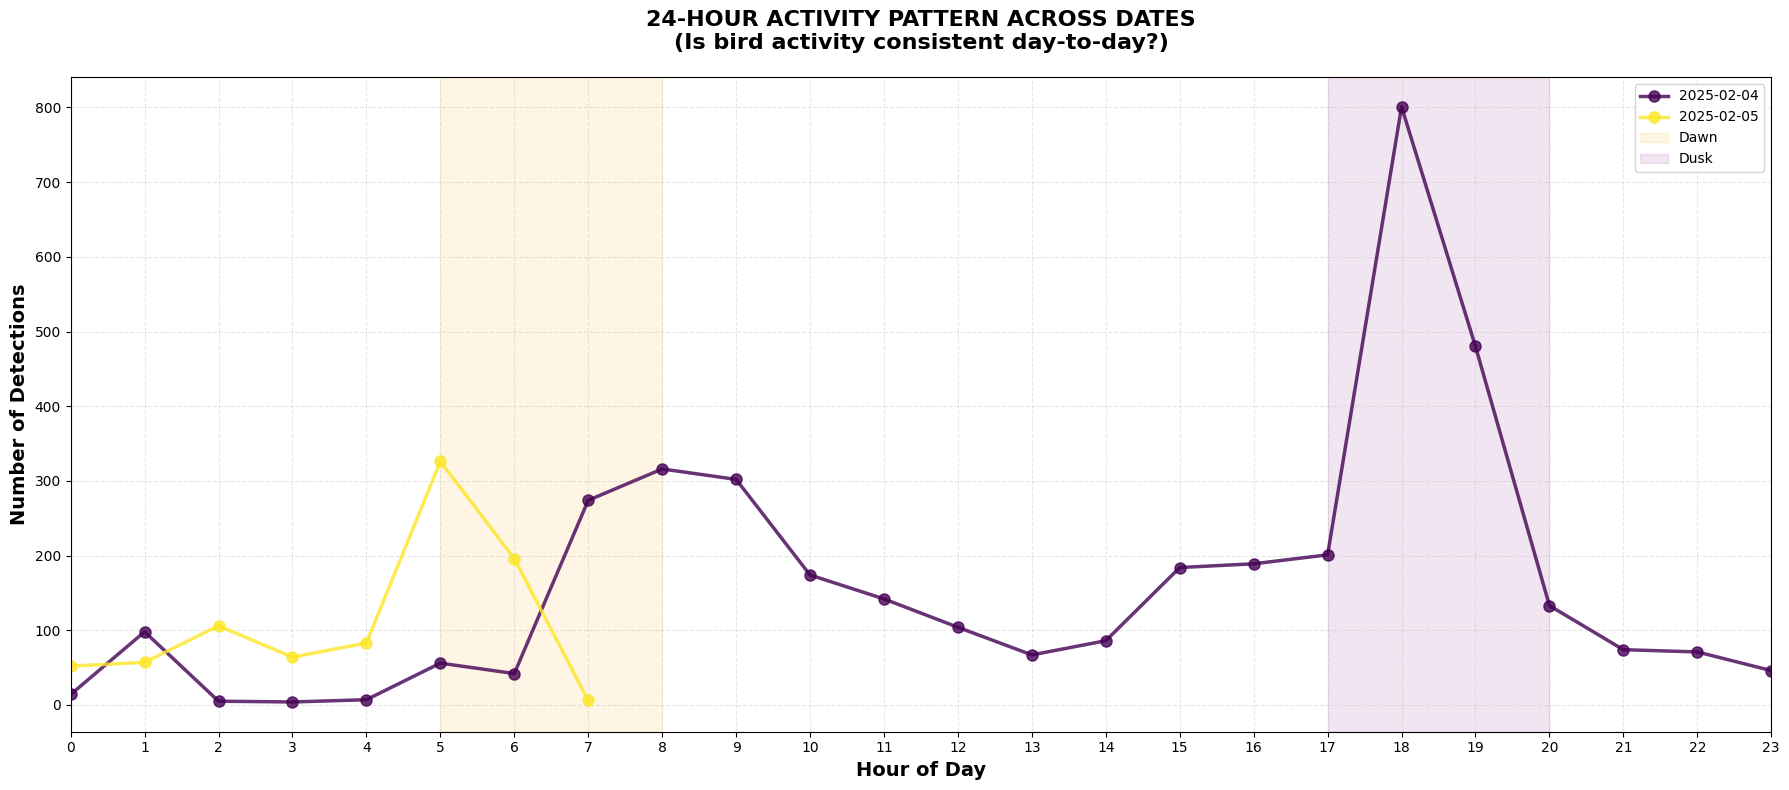


Dates covered: 2025-02-04 to 2025-02-05
Total days: 2


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("detections_master.csv")
df['datetime_local'] = pd.to_datetime(df['datetime_local'])
df['hour'] = df['datetime_local'].dt.hour
df['date'] = df['datetime_local'].dt.date
df['day_hour'] = df['datetime_local'].dt.strftime('%Y-%m-%d %H:00')

# GRAPH 1: Multi-Day Activity Pattern - See if behavior is consistent across dates
fig, ax = plt.subplots(figsize=(18, 8))

dates = sorted(df['date'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(dates)))

for i, date in enumerate(dates):
    day_data = df[df['date'] == date]
    hourly_counts = day_data.groupby('hour').size()
    ax.plot(hourly_counts.index, hourly_counts.values, marker='o', linewidth=2.5, 
            label=str(date), color=colors[i], markersize=8, alpha=0.8)

ax.set_xlabel('Hour of Day', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Detections', fontsize=14, fontweight='bold')
ax.set_title('24-HOUR ACTIVITY PATTERN ACROSS DATES\n(Is bird activity consistent day-to-day?)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(0, 24))
ax.set_xlim(0, 23)
ax.grid(True, alpha=0.3, linestyle='--')
ax.axvspan(5, 8, alpha=0.1, color='orange', label='Dawn')
ax.axvspan(17, 20, alpha=0.1, color='purple', label='Dusk')
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nDates covered: {df['date'].min()} to {df['date'].max()}")
print(f"Total days: {df['date'].nunique()}")

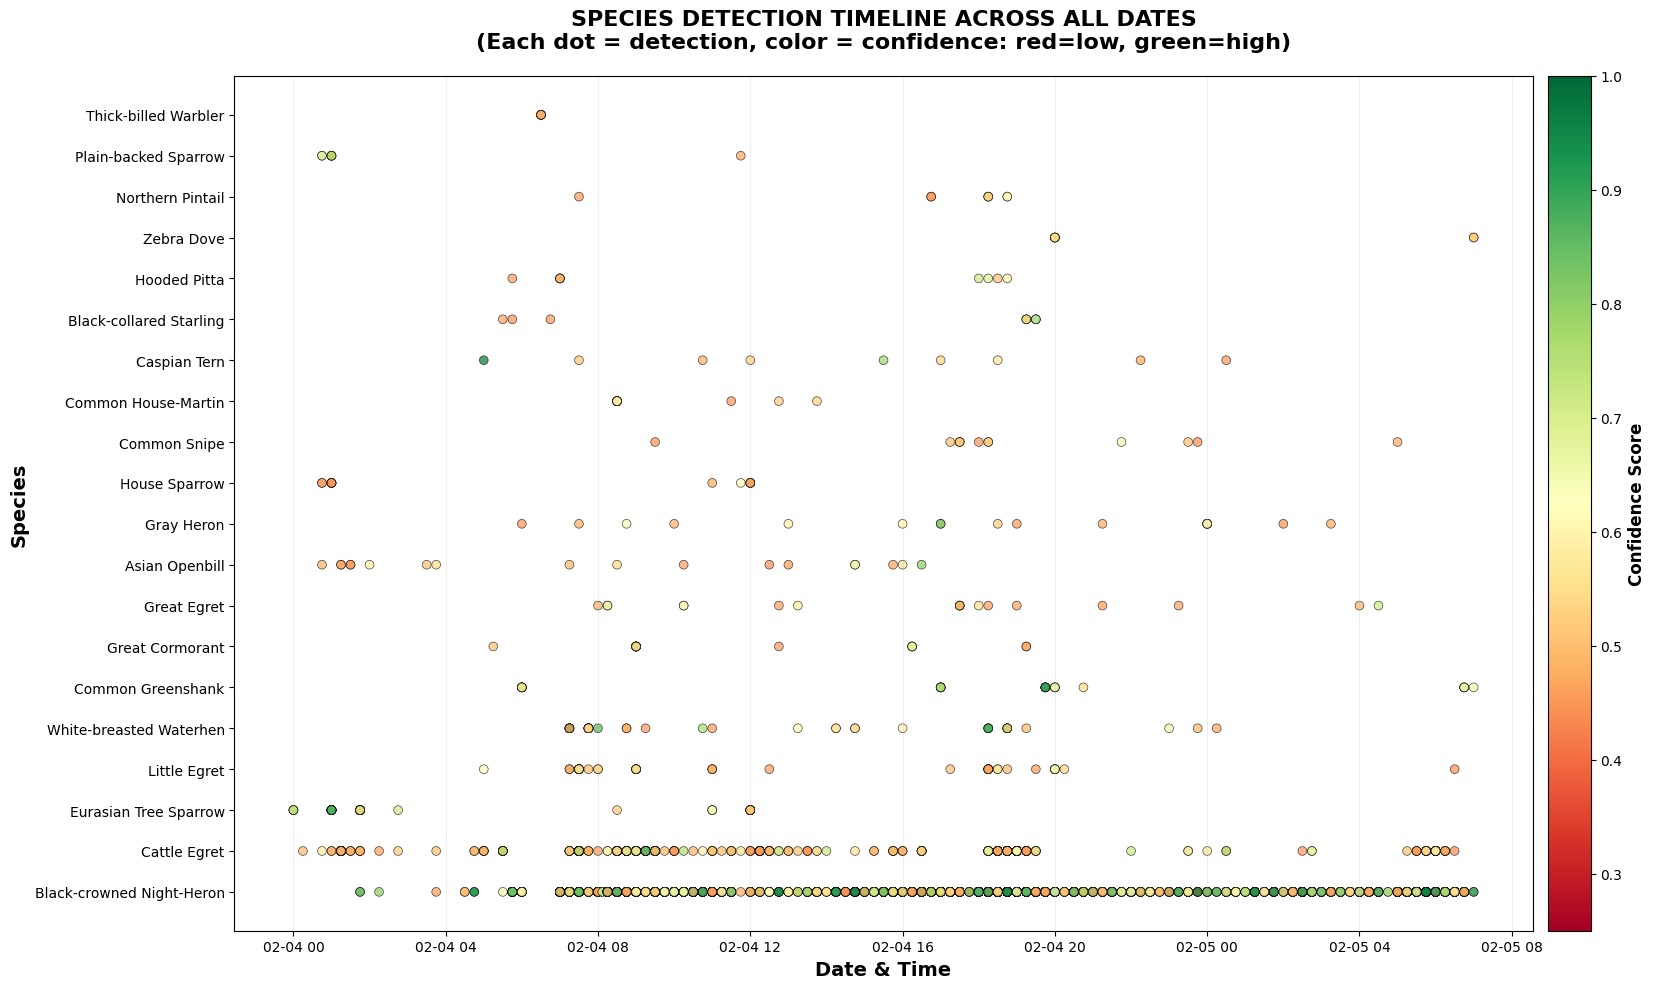


Species with detections across multiple days:
  Black-crowned Night-Heron: 3783 detections across 2 days
  Cattle Egret: 557 detections across 2 days
  Eurasian Tree Sparrow: 64 detections across 1 days
  Little Egret: 45 detections across 2 days
  White-breasted Waterhen: 43 detections across 2 days
  Common Greenshank: 29 detections across 2 days
  Great Cormorant: 19 detections across 1 days
  Great Egret: 18 detections across 2 days
  Asian Openbill: 18 detections across 1 days
  Gray Heron: 18 detections across 2 days


In [19]:
# GRAPH 2: Species Presence Timeline - Which species show up when across all dates?
fig, ax = plt.subplots(figsize=(18, 10))

# Get top 20 species
top_species = df['species_common'].value_counts().head(20).index

# Create timeline showing when each species was detected
for i, species in enumerate(top_species):
    species_data = df[df['species_common'] == species]
    times = species_data['datetime_local']
    y_pos = np.ones(len(times)) * i
    
    # Color by confidence
    colors = plt.cm.RdYlGn(species_data['confidence'].values)
    ax.scatter(times, y_pos, alpha=0.7, s=40, c=colors, edgecolors='black', linewidths=0.5)

ax.set_yticks(range(len(top_species)))
ax.set_yticklabels(top_species, fontsize=10)
ax.set_xlabel('Date & Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Species', fontsize=14, fontweight='bold')
ax.set_title('SPECIES DETECTION TIMELINE ACROSS ALL DATES\n(Each dot = detection, color = confidence: red=low, green=high)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.2, axis='x')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=0.25, vmax=1.0))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Confidence Score', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nSpecies with detections across multiple days:")
for species in top_species[:10]:
    days_present = df[df['species_common'] == species]['date'].nunique()
    total_detections = len(df[df['species_common'] == species])
    print(f"  {species}: {total_detections} detections across {days_present} days")

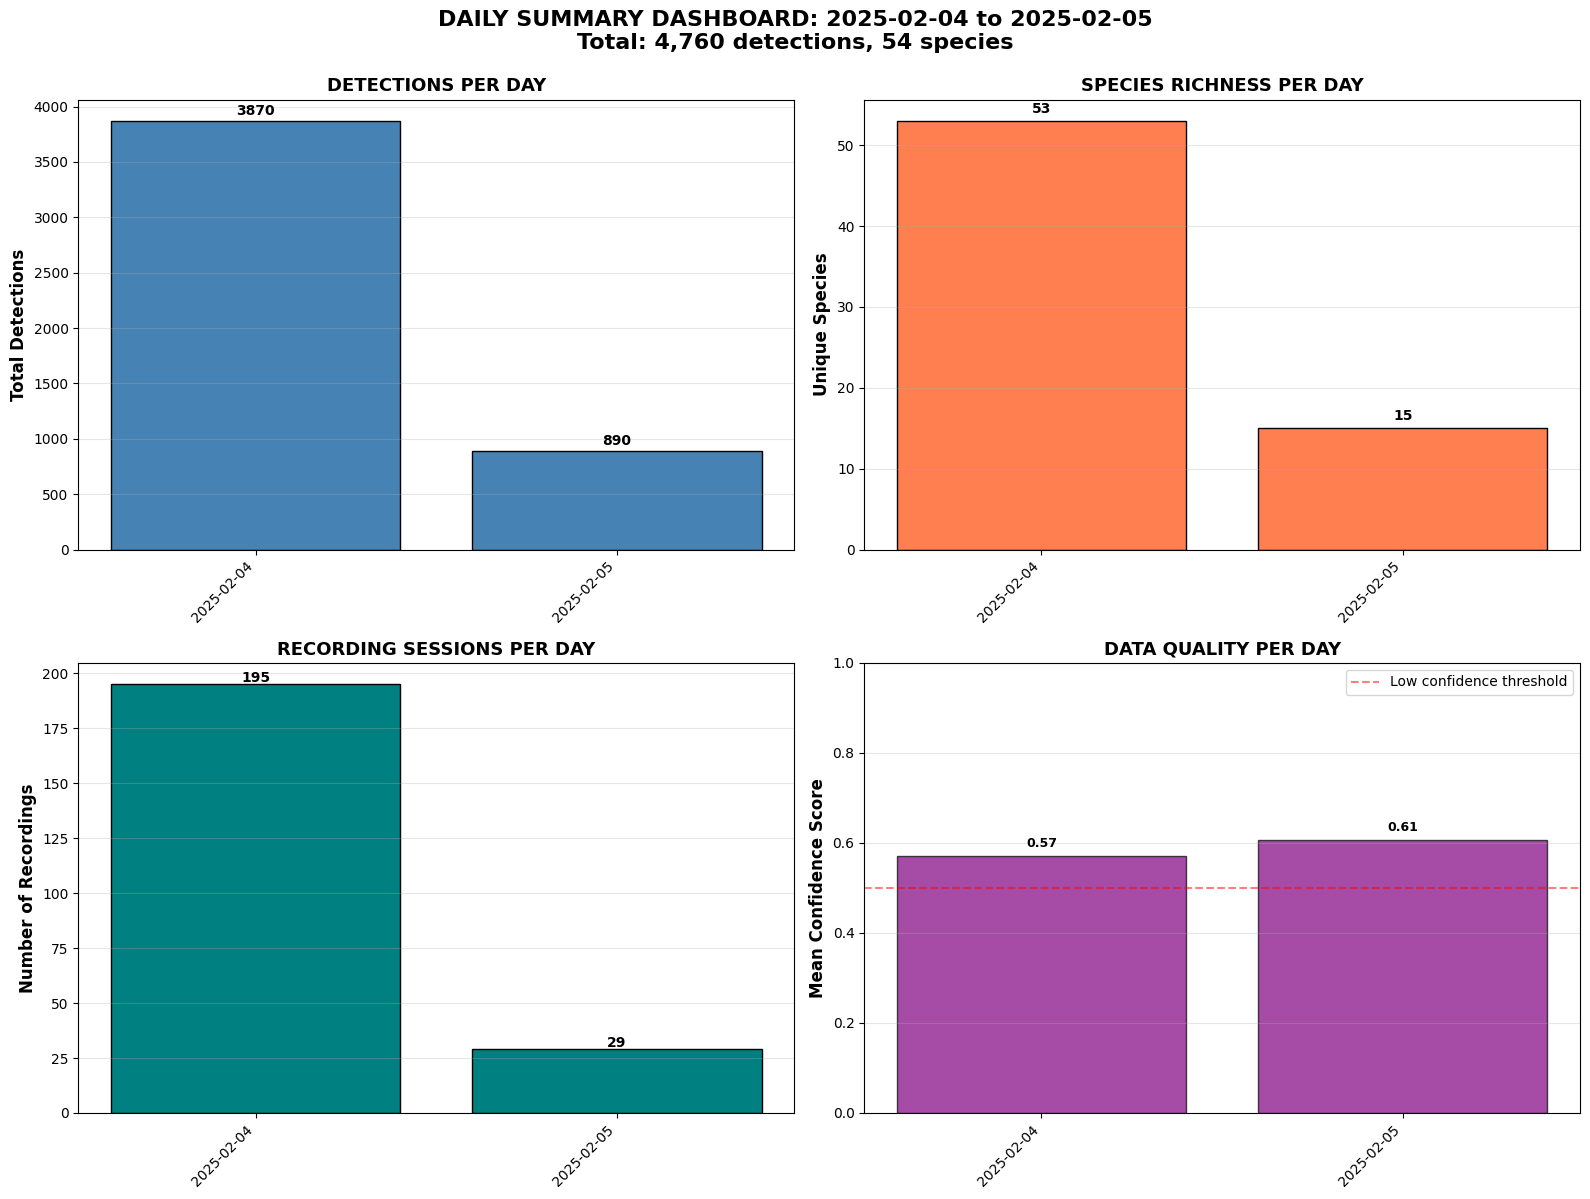


DAILY BREAKDOWN:

2025-02-04:
  Recordings: 195
  Detections: 3,870
  Species: 53
  Top species: Black-crowned Night-Heron (2984 detections)
  Peak hour: 18:00

2025-02-05:
  Recordings: 29
  Detections: 890
  Species: 15
  Top species: Black-crowned Night-Heron (799 detections)
  Peak hour: 5:00


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

dates = sorted(df['date'].unique())

daily_counts = df.groupby('date').size()
ax1 = axes[0, 0]
ax1.bar(range(len(daily_counts)), daily_counts.values, color='steelblue', edgecolor='black')
ax1.set_xticks(range(len(daily_counts)))
ax1.set_xticklabels([str(d) for d in daily_counts.index], rotation=45, ha='right')
ax1.set_ylabel('Total Detections', fontsize=12, fontweight='bold')
ax1.set_title('DETECTIONS PER DAY', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(daily_counts.values):
    ax1.text(i, v + 50, str(v), ha='center', fontweight='bold')

daily_richness = df.groupby('date')['species_common'].nunique()
ax2 = axes[0, 1]
ax2.bar(range(len(daily_richness)), daily_richness.values, color='coral', edgecolor='black')
ax2.set_xticks(range(len(daily_richness)))
ax2.set_xticklabels([str(d) for d in daily_richness.index], rotation=45, ha='right')
ax2.set_ylabel('Unique Species', fontsize=12, fontweight='bold')
ax2.set_title('SPECIES RICHNESS PER DAY', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(daily_richness.values):
    ax2.text(i, v + 1, str(v), ha='center', fontweight='bold')

# Bottom left: Recording coverage per day
recordings_per_day = df.groupby('date')['file_name'].nunique()
ax3 = axes[1, 0]
ax3.bar(range(len(recordings_per_day)), recordings_per_day.values, color='teal', edgecolor='black')
ax3.set_xticks(range(len(recordings_per_day)))
ax3.set_xticklabels([str(d) for d in recordings_per_day.index], rotation=45, ha='right')
ax3.set_ylabel('Number of Recordings', fontsize=12, fontweight='bold')
ax3.set_title('RECORDING SESSIONS PER DAY', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(recordings_per_day.values):
    ax3.text(i, v + 1, str(v), ha='center', fontweight='bold')

# Bottom right: Average confidence per day
daily_confidence = df.groupby('date')['confidence'].mean()
ax4 = axes[1, 1]
ax4.bar(range(len(daily_confidence)), daily_confidence.values, color='purple', edgecolor='black', alpha=0.7)
ax4.set_xticks(range(len(daily_confidence)))
ax4.set_xticklabels([str(d) for d in daily_confidence.index], rotation=45, ha='right')
ax4.set_ylabel('Mean Confidence Score', fontsize=12, fontweight='bold')
ax4.set_title('DATA QUALITY PER DAY', fontsize=13, fontweight='bold')
ax4.set_ylim(0, 1.0)
ax4.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='Low confidence threshold')
ax4.grid(True, alpha=0.3, axis='y')
ax4.legend()
for i, v in enumerate(daily_confidence.values):
    ax4.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold', fontsize=9)

plt.suptitle(f'DAILY SUMMARY DASHBOARD: {df["date"].min()} to {df["date"].max()}\nTotal: {len(df):,} detections, {df["species_common"].nunique()} species', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("DAILY BREAKDOWN:")
print("="*70)
for date in dates:
    day_data = df[df['date'] == date]
    print(f"\n{date}:")
    print(f"  Recordings: {day_data['file_name'].nunique()}")
    print(f"  Detections: {len(day_data):,}")
    print(f"  Species: {day_data['species_common'].nunique()}")
    print(f"  Top species: {day_data['species_common'].value_counts().index[0]} ({day_data['species_common'].value_counts().iloc[0]} detections)")
    print(f"  Peak hour: {day_data.groupby('hour').size().idxmax()}:00")

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

df = pd.read_csv("detections_master.csv")
df['datetime_local'] = pd.to_datetime(df['datetime_local'])
df['date'] = df['datetime_local'].dt.date

# Filter to Feb 4
feb4 = df[df['date'] == pd.to_datetime('2025-02-04').date()].copy()
feb4['hour'] = feb4['datetime_local'].dt.hour
feb4['minute'] = feb4['datetime_local'].dt.minute
feb4['time_decimal'] = feb4['hour'] + feb4['minute']/60 + feb4['start_time_sec']/3600
feb4['call_duration'] = feb4['end_time_sec'] - feb4['start_time_sec']

print(f"Feb 4 data: {len(feb4)} detections, {feb4['species_common'].nunique()} species")

Feb 4 data: 3870 detections, 53 species


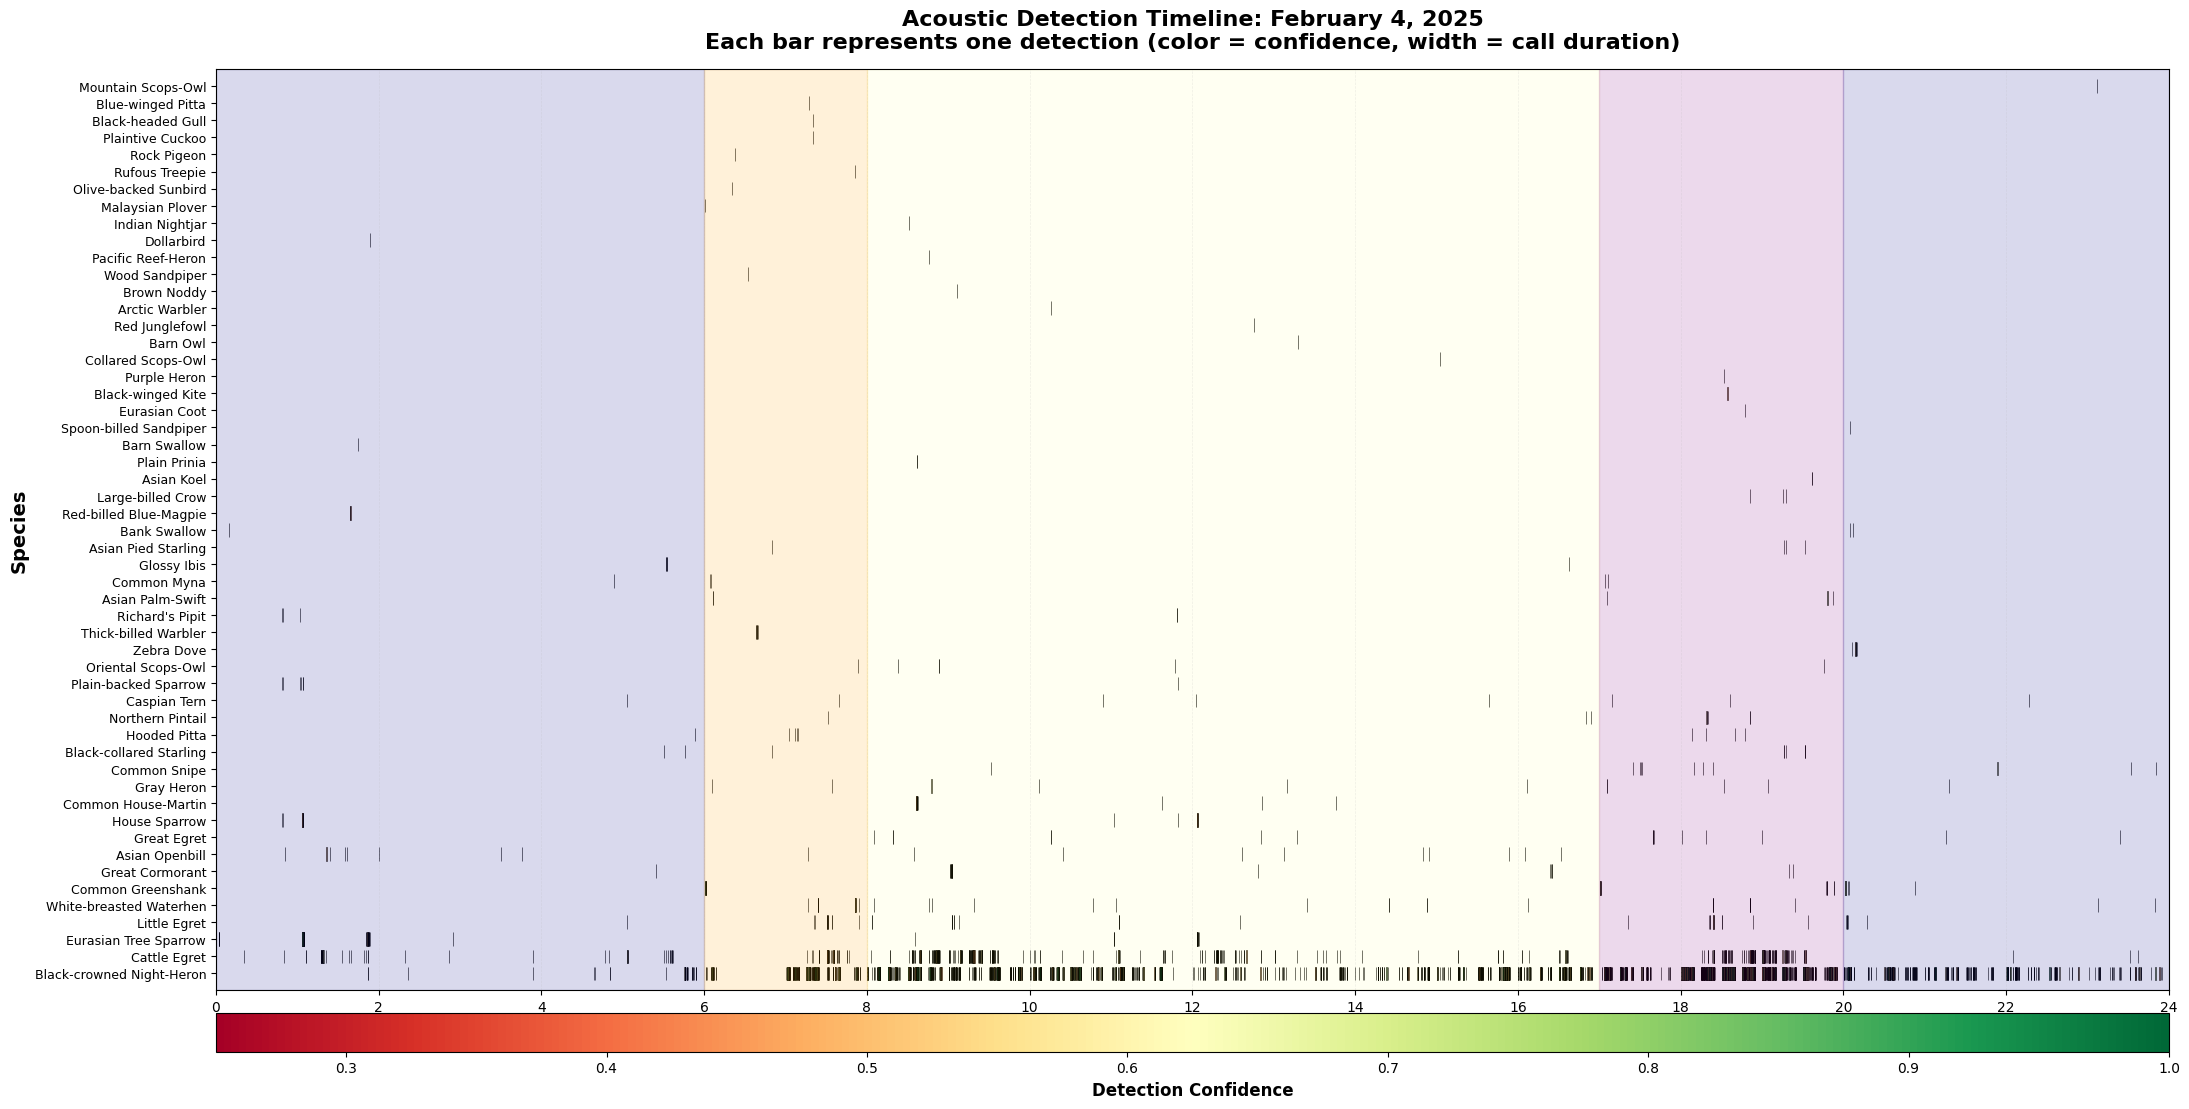

In [24]:
# GRAPH 1: Acoustic Spectrogram Timeline
fig, ax = plt.subplots(figsize=(22, 12))

all_species = feb4['species_common'].value_counts().index.tolist()
species_to_idx = {sp: i for i, sp in enumerate(all_species)}

times = []
species_indices = []
confidences = []
durations = []

for _, row in feb4.iterrows():
    start_time = row['time_decimal']
    duration = (row['end_time_sec'] - row['start_time_sec']) / 3600
    times.append(start_time)
    species_indices.append(species_to_idx[row['species_common']])
    confidences.append(row['confidence'])
    durations.append(duration)

colors = plt.cm.RdYlGn(np.array(confidences))

for i in range(len(times)):
    rect = Rectangle((times[i], species_indices[i] - 0.4), 
                     durations[i], 0.8,
                     facecolor=colors[i], 
                     edgecolor='black', 
                     linewidth=0.5,
                     alpha=0.8)
    ax.add_patch(rect)

ax.set_xlim(0, 24)
ax.set_ylim(-1, len(all_species))
ax.set_xlabel('Hour of Day', fontsize=14, fontweight='bold')
ax.set_ylabel('Species', fontsize=14, fontweight='bold')
ax.set_title('Acoustic Detection Timeline: February 4, 2025\nEach bar represents one detection (color = confidence, width = call duration)', 
             fontsize=16, fontweight='bold', pad=15)
ax.set_yticks(range(len(all_species)))
ax.set_yticklabels(all_species, fontsize=9)
ax.set_xticks(range(0, 25, 2))
ax.grid(True, alpha=0.2, axis='x', linestyle='--', linewidth=0.5)

ax.axvspan(0, 6, alpha=0.15, color='darkblue', label='Night')
ax.axvspan(6, 8, alpha=0.15, color='orange', label='Dawn')
ax.axvspan(8, 17, alpha=0.05, color='yellow', label='Day')
ax.axvspan(17, 20, alpha=0.15, color='purple', label='Dusk')
ax.axvspan(20, 24, alpha=0.15, color='darkblue')

sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=0.25, vmax=1.0))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02, aspect=50)
cbar.set_label('Detection Confidence', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

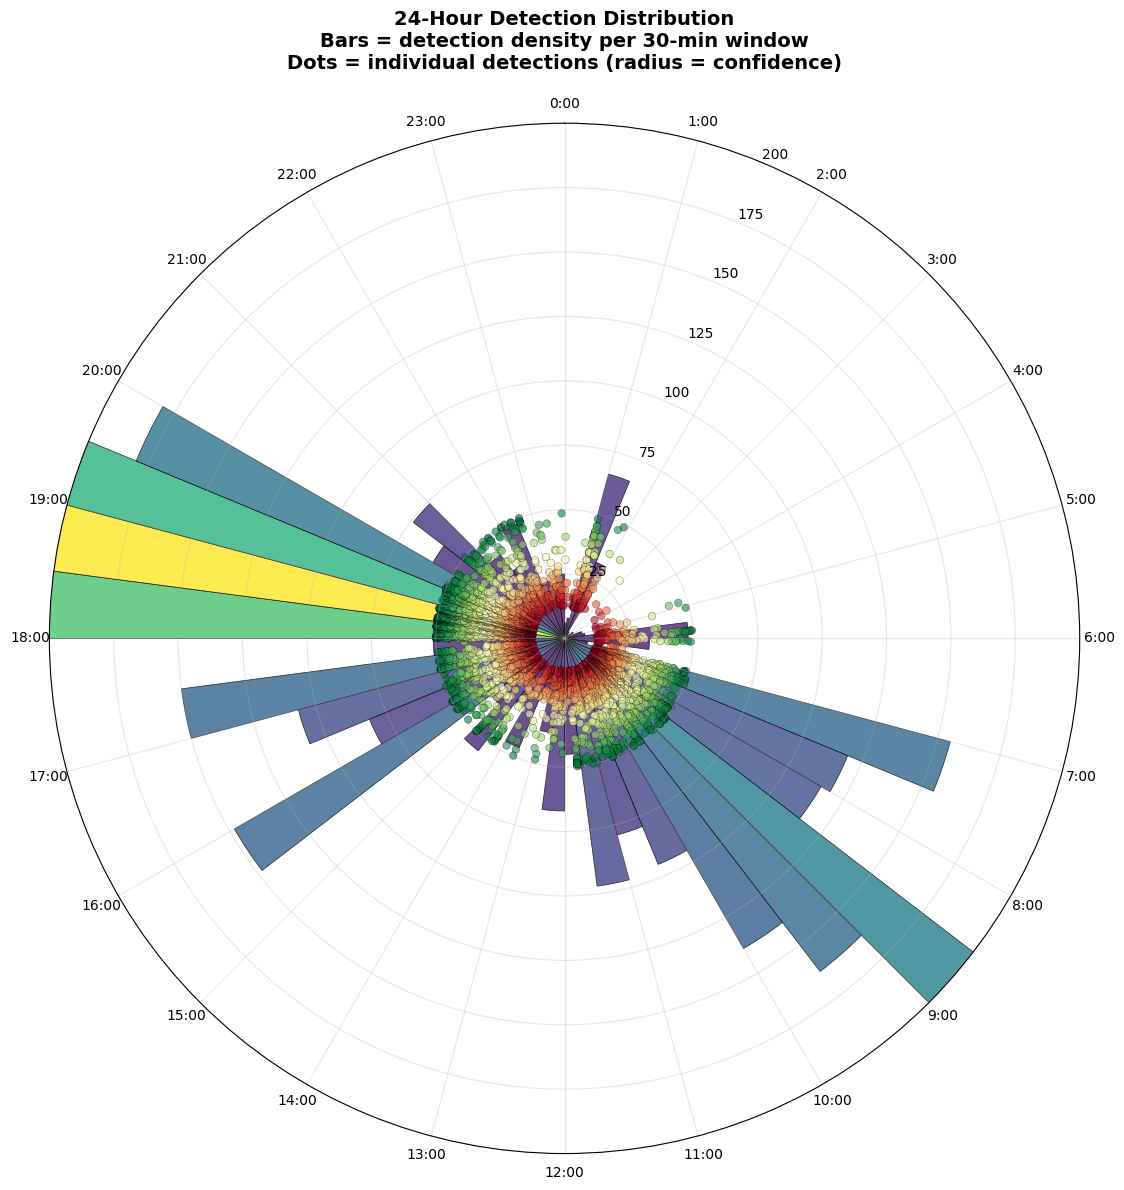

In [26]:
# GRAPH 2: Circular 24-Hour Clock View (with adjusted scale)
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

theta = np.array(feb4['time_decimal']) * (2 * np.pi / 24)
radii = feb4['confidence'].values

bins = 48
hist, bin_edges = np.histogram(feb4['time_decimal'], bins=bins, range=(0, 24))
theta_bins = (bin_edges[:-1] + bin_edges[1:]) / 2 * (2 * np.pi / 24)
width = (2 * np.pi) / bins

bars = ax.bar(theta_bins, hist, width=width, bottom=0, 
              color=plt.cm.viridis(hist/hist.max()), 
              edgecolor='black', linewidth=0.5, alpha=0.8)

ax.scatter(theta, radii * 50, c=feb4['confidence'], cmap='RdYlGn', 
          s=30, alpha=0.6, edgecolors='black', linewidth=0.3)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([f'{h}:00' for h in range(24)], fontsize=10)

# THIS IS THE KEY LINE - change from max(hist)*1.2 to a fixed value
ax.set_ylim(0, 200)  # Change this number to adjust the scale

ax.set_title('24-Hour Detection Distribution\nBars = detection density per 30-min window\nDots = individual detections (radius = confidence)', 
            fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

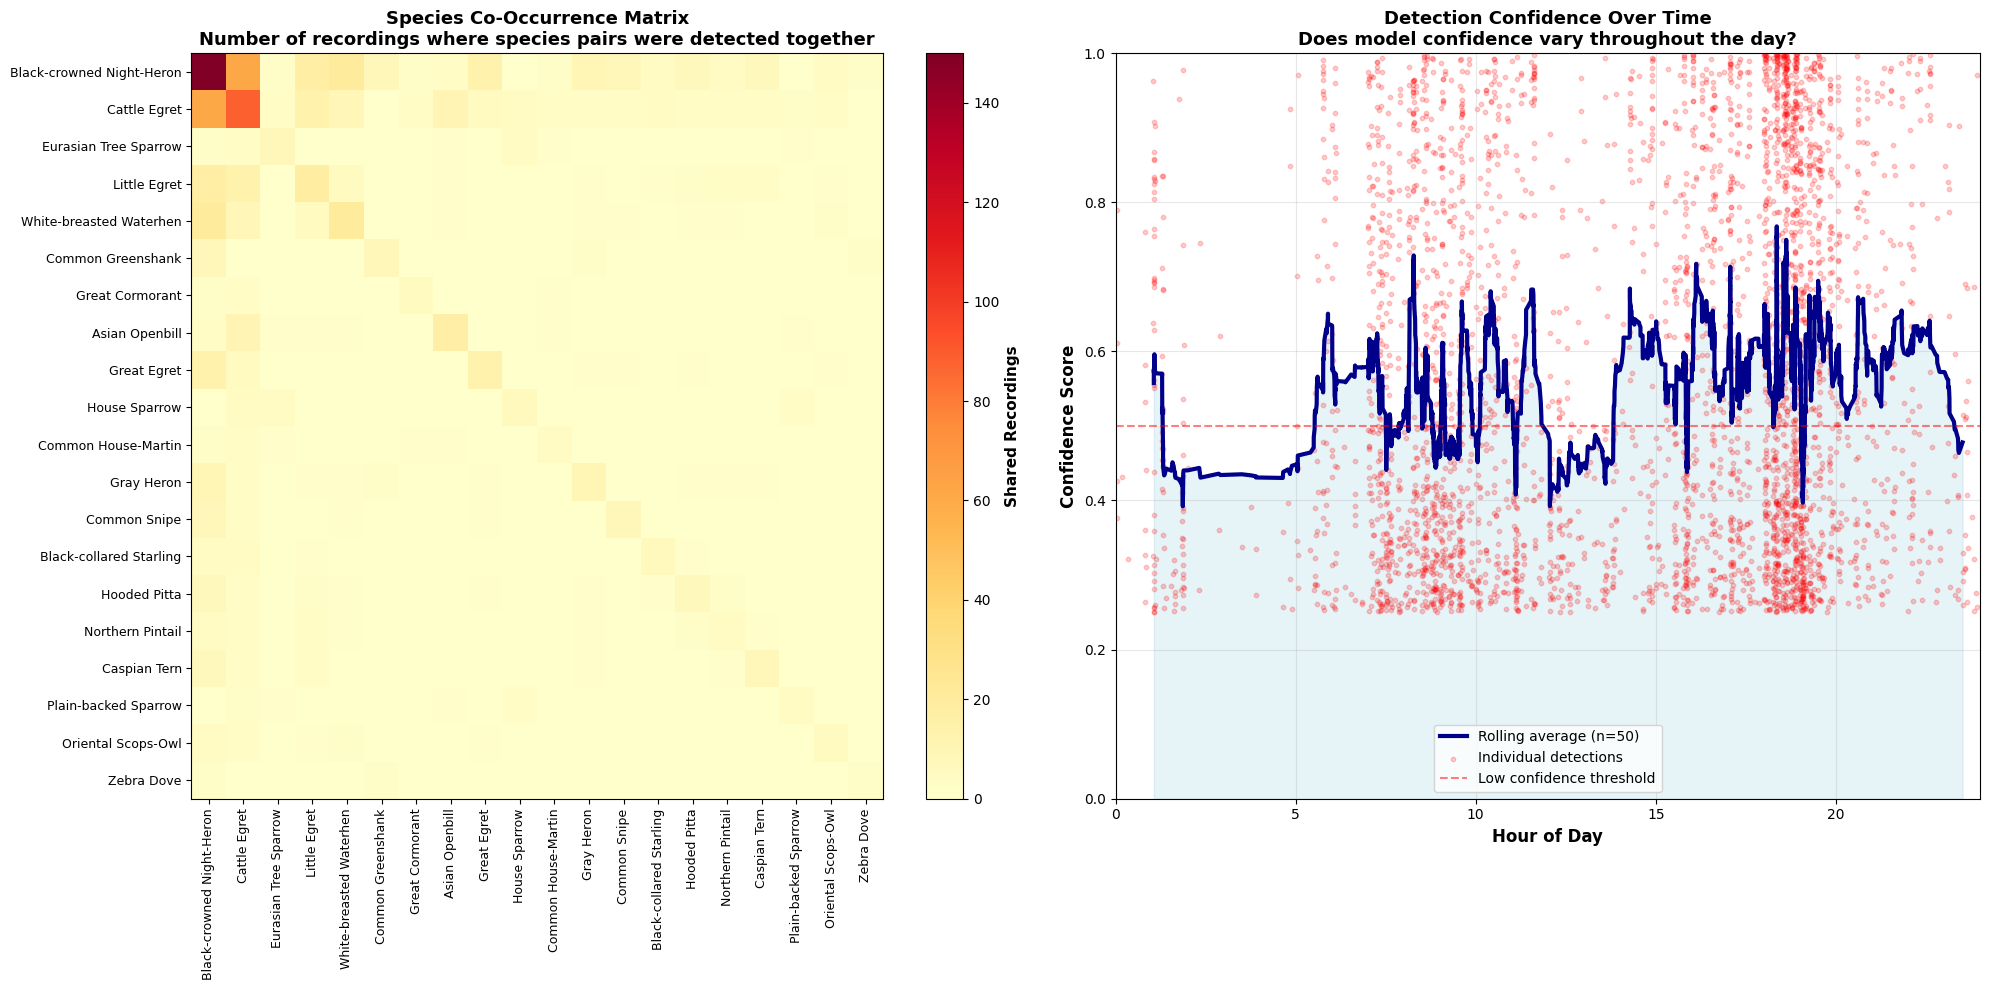


FEBRUARY 4, 2025 - DETAILED ANALYSIS

OVERALL STATISTICS:
   Total detections: 3,870
   Unique species: 53
   Recordings analyzed: 195
   Time span: 0:00 to 23:00
   Mean confidence: 0.570

TEMPORAL PATTERNS:
   Peak hour: 18:00 with 801 detections
   Quietest hour: 3:00 with 4 detections
   Dawn activity (6-8am): 632 detections
   Dusk activity (5-8pm): 1615 detections
   Night activity (8pm-6am): 508 detections

SPECIES COMPOSITION:
   Top 1: Black-crowned Night-Heron - 2984 detections (77.1%)
   Top 2: Cattle Egret - 492 detections (12.7%)
   Top 3: Eurasian Tree Sparrow - 64 detections (1.7%)
   Top 4: Little Egret - 44 detections (1.1%)
   Top 5: White-breasted Waterhen - 42 detections (1.1%)

RARE SPECIES:
   Species with 3 or fewer detections: 27
      Bank Swallow: 3 detection(s)
      Red-billed Blue-Magpie: 3 detection(s)
      Large-billed Crow: 3 detection(s)
      Asian Koel: 2 detection(s)
      Plain Prinia: 2 detection(s)
      Barn Swallow: 1 detection(s)
      Spoon-

In [27]:
# GRAPH 3: Species Co-Occurrence Matrix with Additional Metrics
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Left: Co-occurrence heatmap
ax1 = axes[0]

species_list = feb4['species_common'].value_counts().head(20).index
cooccur_matrix = []

for sp1 in species_list:
    row = []
    for sp2 in species_list:
        files_sp1 = set(feb4[feb4['species_common'] == sp1]['file_name'])
        files_sp2 = set(feb4[feb4['species_common'] == sp2]['file_name'])
        overlap = len(files_sp1 & files_sp2)
        row.append(overlap)
    cooccur_matrix.append(row)

cooccur_matrix = np.array(cooccur_matrix)

im = ax1.imshow(cooccur_matrix, cmap='YlOrRd', aspect='auto')
ax1.set_xticks(range(len(species_list)))
ax1.set_yticks(range(len(species_list)))
ax1.set_xticklabels([sp[:25] for sp in species_list], rotation=90, fontsize=9)
ax1.set_yticklabels([sp[:25] for sp in species_list], fontsize=9)
ax1.set_title('Species Co-Occurrence Matrix\nNumber of recordings where species pairs were detected together', 
              fontsize=13, fontweight='bold')

cbar1 = plt.colorbar(im, ax=ax1)
cbar1.set_label('Shared Recordings', fontsize=11, fontweight='bold')

# Right: Confidence evolution over time
ax2 = axes[1]

feb4_sorted = feb4.sort_values('time_decimal')
window_size = 50
rolling_conf = feb4_sorted['confidence'].rolling(window=window_size, center=True).mean()

ax2.plot(feb4_sorted['time_decimal'], rolling_conf, 
        linewidth=3, color='darkblue', label=f'Rolling average (n={window_size})')
ax2.fill_between(feb4_sorted['time_decimal'], 0, rolling_conf, 
                 alpha=0.3, color='lightblue')
ax2.scatter(feb4['time_decimal'], feb4['confidence'], 
           s=10, alpha=0.2, color='red', label='Individual detections')

ax2.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Confidence Score', fontsize=12, fontweight='bold')
ax2.set_title('Detection Confidence Over Time\nDoes model confidence vary throughout the day?', 
             fontsize=13, fontweight='bold')
ax2.set_xlim(0, 24)
ax2.set_ylim(0, 1.0)
ax2.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='Low confidence threshold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "="*70)
print("FEBRUARY 4, 2025 - DETAILED ANALYSIS")
print("="*70)

print(f"\nOVERALL STATISTICS:")
print(f"   Total detections: {len(feb4):,}")
print(f"   Unique species: {feb4['species_common'].nunique()}")
print(f"   Recordings analyzed: {feb4['file_name'].nunique()}")
print(f"   Time span: {feb4['hour'].min()}:00 to {feb4['hour'].max()}:00")
print(f"   Mean confidence: {feb4['confidence'].mean():.3f}")

print(f"\nTEMPORAL PATTERNS:")
hourly = feb4.groupby('hour').size()
print(f"   Peak hour: {hourly.idxmax()}:00 with {hourly.max()} detections")
print(f"   Quietest hour: {hourly.idxmin()}:00 with {hourly.min()} detections")
print(f"   Dawn activity (6-8am): {feb4[feb4['hour'].between(6,8)].shape[0]} detections")
print(f"   Dusk activity (5-8pm): {feb4[feb4['hour'].between(17,20)].shape[0]} detections")
print(f"   Night activity (8pm-6am): {feb4[(feb4['hour'] >= 20) | (feb4['hour'] < 6)].shape[0]} detections")

print(f"\nSPECIES COMPOSITION:")
top5 = feb4['species_common'].value_counts().head(5)
for i, (species, count) in enumerate(top5.items(), 1):
    pct = (count / len(feb4)) * 100
    print(f"   Top {i}: {species} - {count} detections ({pct:.1f}%)")

print(f"\nRARE SPECIES:")
rare = feb4['species_common'].value_counts()
rare_species = rare[rare <= 3]
print(f"   Species with 3 or fewer detections: {len(rare_species)}")
for species, count in rare_species.head(10).items():
    print(f"      {species}: {count} detection(s)")

print(f"\nCALL CHARACTERISTICS:")
print(f"   Mean call duration: {feb4['call_duration'].mean():.2f} seconds")
print(f"   Median call duration: {feb4['call_duration'].median():.2f} seconds")
print(f"   Longest call: {feb4['call_duration'].max():.2f}s by {feb4.loc[feb4['call_duration'].idxmax(), 'species_common']}")
print(f"   Shortest call: {feb4['call_duration'].min():.2f}s")

print(f"\nRECORDING QUALITY:")
detections_per_file = feb4.groupby('file_name').size()
print(f"   Mean detections per recording: {detections_per_file.mean():.1f}")
print(f"   Max detections in one recording: {detections_per_file.max()}")
print(f"   High confidence detections (>0.9): {(feb4['confidence'] > 0.9).sum()} ({(feb4['confidence'] > 0.9).sum()/len(feb4)*100:.1f}%)")

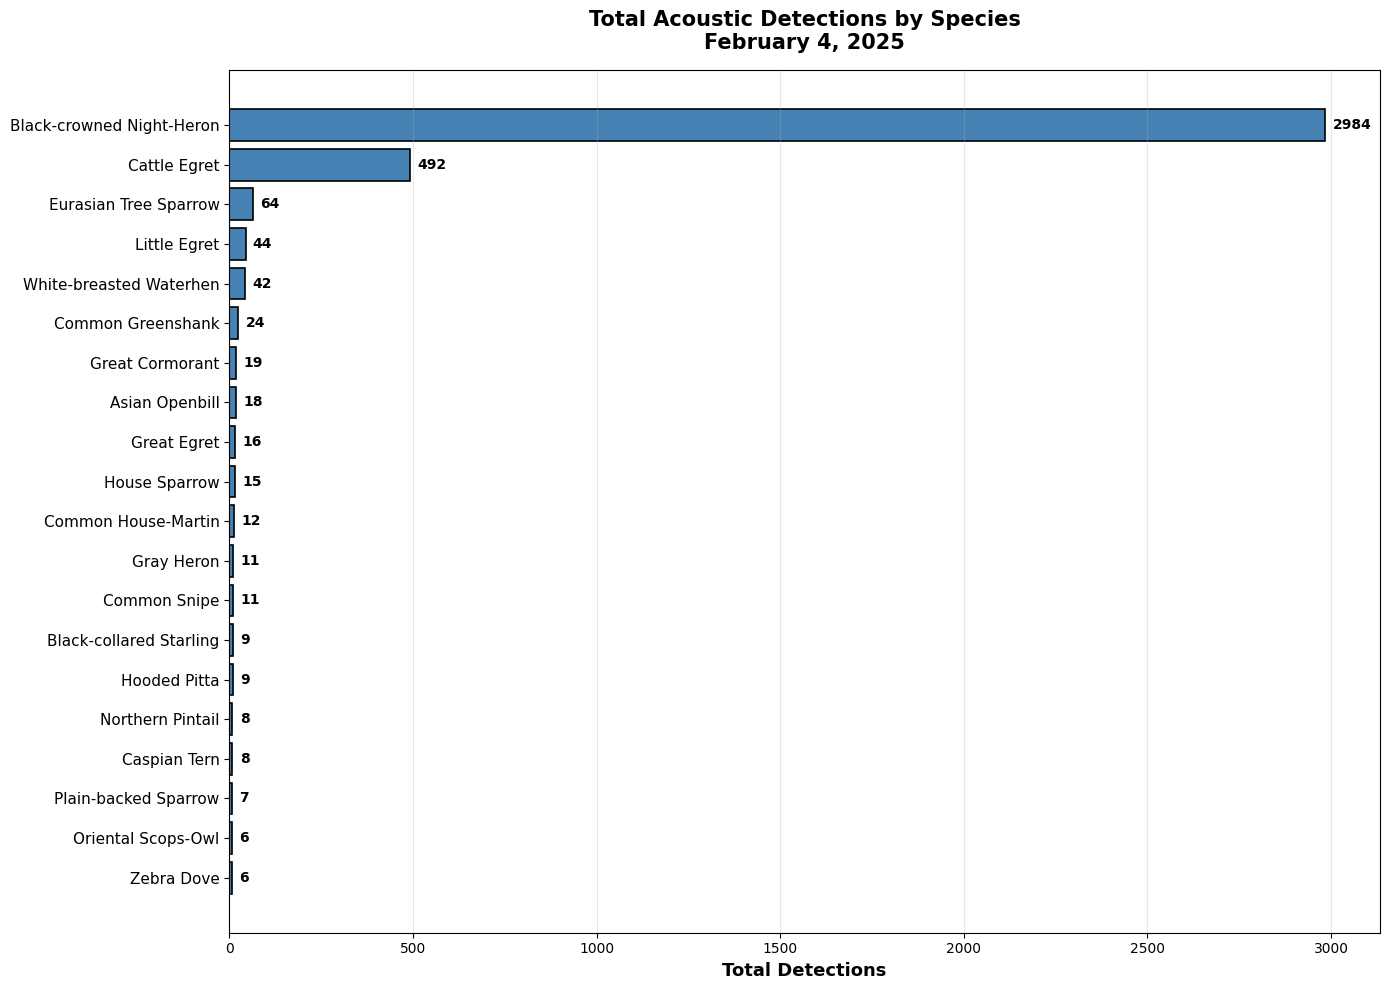

Top 5 most detected species:
  1. Black-crowned Night-Heron: 2984 detections (77.1%)
  2. Cattle Egret: 492 detections (12.7%)
  3. Eurasian Tree Sparrow: 64 detections (1.7%)
  4. Little Egret: 44 detections (1.1%)
  5. White-breasted Waterhen: 42 detections (1.1%)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("detections_master.csv")
df['datetime_local'] = pd.to_datetime(df['datetime_local'])
df['date'] = df['datetime_local'].dt.date

# Focus on Feb 4
feb4 = df[df['date'] == pd.to_datetime('2025-02-04').date()].copy()

# GRAPH 1: Total Detections by Species (Simple Bar Chart)
fig, ax = plt.subplots(figsize=(14, 10))

species_counts = feb4['species_common'].value_counts().head(20)

bars = ax.barh(range(len(species_counts)), species_counts.values, color='steelblue', edgecolor='black', linewidth=1.2)

# Add value labels on bars
for i, (species, count) in enumerate(species_counts.items()):
    ax.text(count + 20, i, str(count), va='center', fontweight='bold', fontsize=10)

ax.set_yticks(range(len(species_counts)))
ax.set_yticklabels(species_counts.index, fontsize=11)
ax.set_xlabel('Total Detections', fontsize=13, fontweight='bold')
ax.set_title('Total Acoustic Detections by Species\nFebruary 4, 2025', 
             fontsize=15, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print(f"Top 5 most detected species:")
for i, (species, count) in enumerate(species_counts.head(5).items(), 1):
    pct = (count / len(feb4)) * 100
    print(f"  {i}. {species}: {count} detections ({pct:.1f}%)")